## Operasi Matriks dengan GPU
---


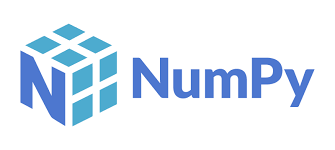
Numpy telah menjadi hadiah bagi komunitas Python. Ilmuwan Data, Praktisi Machine Learning, dan Ahli Statistik dapat memproses data dalam jumlah besar dalam format matriks dengan cara yang mudah dan efisien.

Bahkan Numpy sudah merupakan langkah signifikan dari Python dalam hal kecepatan. Kapan pun kita menemukan kode Python berjalan lambat, terutama jika kita melihat banyak for-loop, sebaiknya pindahkan pemrosesan data ke Numpy dan biarkan vektorisasi bekerja dengan kecepatan tinggi!

Namun, meski dengan penambahan kecepatan itu, Numpy hanya berjalan di CPU. Dengan CPU konsumen biasanya memiliki 8 core atau kurang, jumlah pemrosesan paralel, dan oleh karena itu, jumlah percepatan yang dapat dicapai, menjadi terbatas.

Di situlah teman baru kita CuPy berperan!

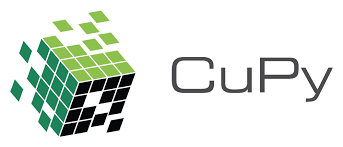

CuPy adalah library yang mengimplementasikan array Numpy pada GPU Nvidia dengan memanfaatkan library GPU CUDA. Dengan implementasi tersebut, kecepatan paralel yang superior dapat dicapai karena banyaknya core CUDA yang dimiliki GPU.

Antarmuka CuPy bisa dibilang merupakan cerminan dari Numpy dan dalam banyak kasus, dapat digunakan sebagai penggantinya langsung. Cukup ganti kode Numpy kita dengan kode CuPy yang kompatibel dan kita akan memiliki kecepatan GPU. CuPy mendukung sebagian besar operasi array yang dimiliki Numpy termasuk pengindeksan, broadcasting, matematika pada array, dan berbagai transformasi matriks.

---
### Membuat array matriks

Kita akan mencoba melihat perbedaan waktu pembuatan array matriks menggunakan CPU dan juga GPU. 

In [ ]:
import time
import cupy as cp
import numpy as np

In [ ]:
s = time.time()
m_cpu = np.random.randint(10, size=(100000,1000))
e = time.time()
print("Waktu CPU :", e - s, "detik")

s = time.time()
m_gpu = cp.random.randint(10, size=(100000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print("Waktu GPU :", e - s, "detik")

Dari hasil di atas, dapat dilihat bahwa semakin besar jumlah array yang dibuat, maka semakin terlihat perbedaan kecepatan antara GPU dan CPU.

---

### Penjumlahan dan perkalian matriks
Pada praktikum sebelumnya sudah dibuat program untuk melakukan penjumlahan dan perkalian matriks menggunakan Numpy. Kali ini kita akan melihat perbedaannya dengan menggunakan Cupy.

---

#### Penambahan Dua Matriks
1. Numpy

In [4]:
s = time.time()

A = np.random.randint(10, size=(1000,1000))

B = np.random.randint(10, size=(1000,1000))

C = A + B   

e = time.time()

print("Waktu CPU :", e - s, "detik")

Waktu CPU : 0.029828310012817383 detik


2. Cupy

In [4]:
s = time.time()

A = cp.random.randint(10, size=(1000,1000))

B = cp.random.randint(10, size=(1000,1000))

C = A + B   

cp.cuda.Stream.null.synchronize()

e = time.time()

print("Waktu GPU :", e - s, "detik")

Waktu GPU : 0.004826545715332031 detik


---

#### Perkalian Dua Matriks

1. Numpy

In [5]:
s = time.time()

A = np.random.randint(10, size=(1000,1000))

B = np.random.randint(10, size=(1000,1000))

C = A.dot(B)

e = time.time()

print("Waktu CPU :", e - s, "detik")

Waktu CPU : 0.7565491199493408 detik


2. Cupy

In [6]:
s = time.time()

A = cp.random.randint(10, size=(1000,1000))

B = cp.random.randint(10, size=(1000,1000))

C = A.dot(B)

cp.cuda.Stream.null.synchronize()

e = time.time()

print("Waktu GPU :", e - s, "detik")

Waktu GPU : 0.551386833190918 detik


---

### Tugas
Cari dan analisa perbedaan waktu antara penggunaan CPU (Numpy) dengan GPU (Cupy) untuk transpos matriks.